<a href="https://www.kaggle.com/code/dasaris/diamond-price-prediction?scriptVersionId=99121859" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA + prediction of Diamond Prices

## About the Dataset

**Context**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

**Content**

* price price in US dollars (\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table width of top of diamond relative to widest point (43--95)

In [1]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#importing the data
diamonds = pd.read_csv('../input/diamonds/diamonds.csv', index_col = 0)

In [3]:
#looking at the data
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### X, Y, Z
What we can see is, that we have 0 values in the columns x, y and z. This would mean that there are diamonds which have no dimensions. It's a sign of faulty data which is why I am going to eliminate those values.

In [6]:
#Dropping dimensionless features

diamonds = diamonds.drop(diamonds[diamonds['x'] == 0].index)
diamonds = diamonds.drop(diamonds[diamonds['y'] == 0].index)
diamonds = diamonds.drop(diamonds[diamonds['z'] == 0].index)

In [7]:
diamonds[['x','y','z']].describe()

,x,y,z
count,53920.000000,53920.000000,53920.000000
mean,5.731627,5.734887,3.540046
std,1.119423,1.140126,0.702530
min,3.730000,3.680000,1.070000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.740000,58.900000,31.800000


In [8]:
#checking for null values 
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
print(diamonds.color.unique())
print(diamonds.cut.unique())
print(diamonds.clarity.unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [10]:
diamonds_num = diamonds.copy()

In [11]:
#Converting Categorial to numeric values

cats = ['color', 'cut', 'clarity']

for i in cats:
    diamonds_num[i+'_numeric'] = pd.factorize(diamonds[i])[0]
    diamonds_num.drop(i, axis = 1, inplace = True)


**Colors:**

E = 0, I = 1, J = 2, H = 3, F = 4, G = 5, D = 6


**Cuts:**

Ideal = 0, Premium = 1, Good = 2, Very Good = 3, Fair = 4

**Clarity:**

SI2= 0, SI1 = 1, VS1 = 2, VS2 = 3, VVS2 = 4, VVS1 = 5, I1 = 6, IF = 7


So, now we have a dataframe with only numeric values:

In [12]:
diamonds_num.head()

,carat,depth,table,price,x,y,z,color_numeric,cut_numeric,clarity_numeric
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,1
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,2,2
4,0.29,62.4,58.0,334,4.20,4.23,2.63,1,1,3
5,0.31,63.3,58.0,335,4.34,4.35,2.75,2,2,0


**We will use this dataframe later**

### Let's have a closer look at the data

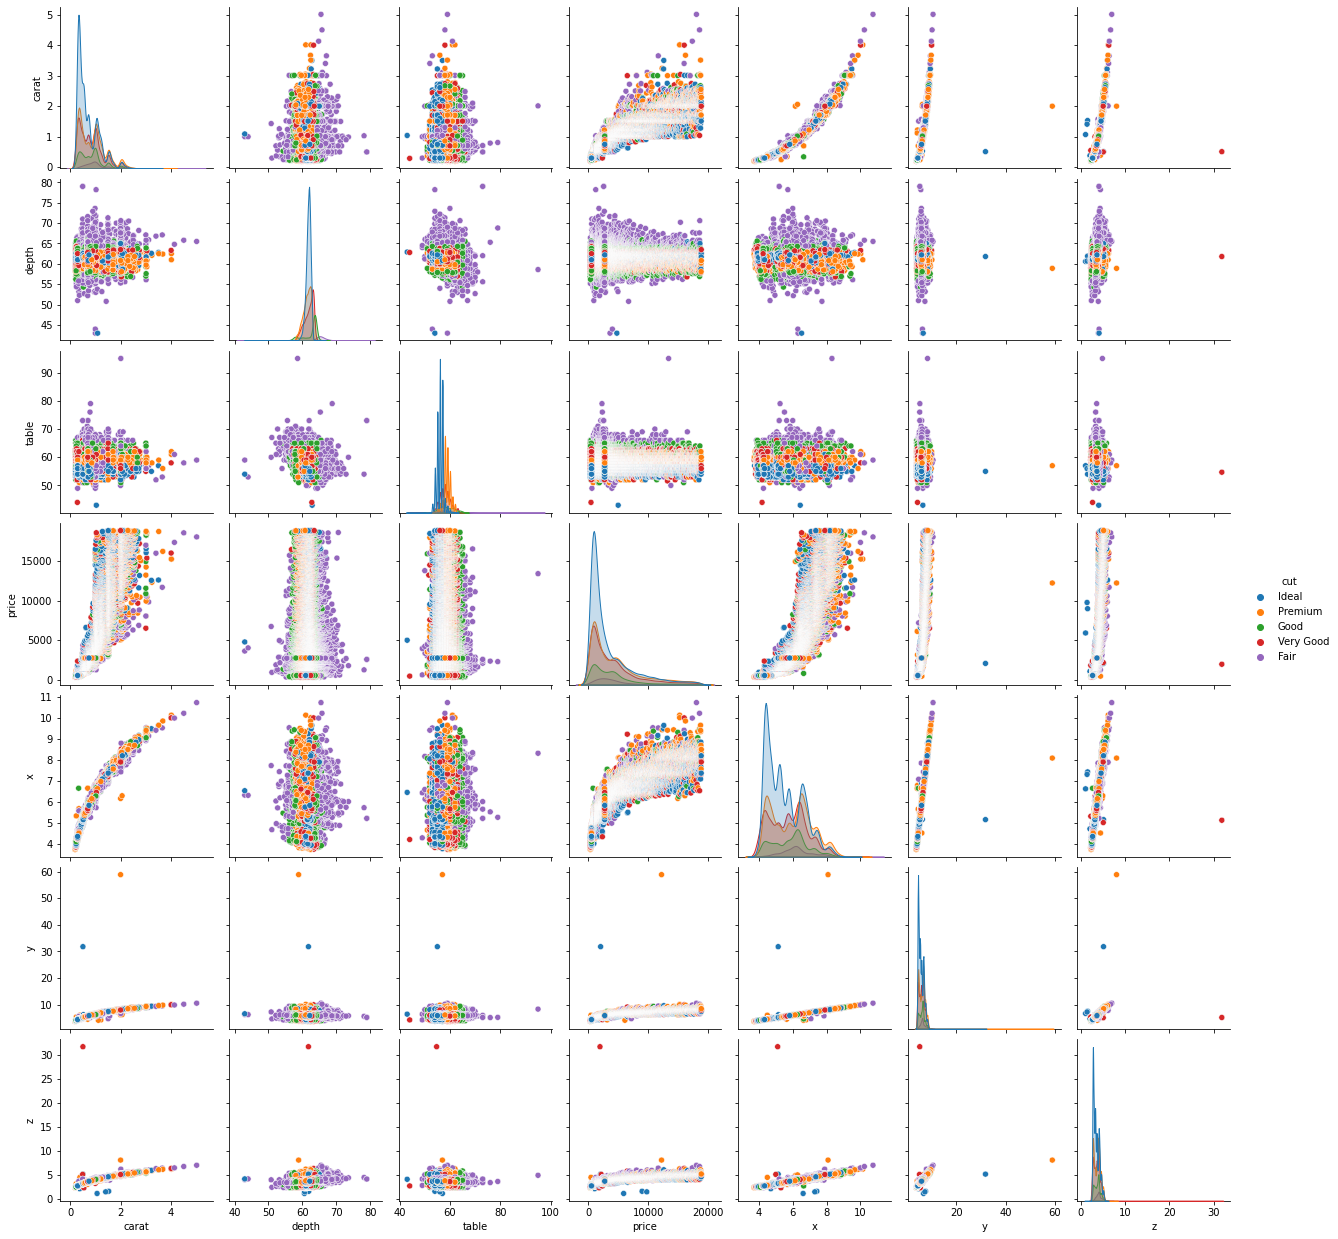

In [13]:
sns.pairplot(diamonds, hue = 'cut')

### Outliers
Looking at the pairplot, we can see that there are outliers for x, y, z, table and depth. Let's have a closer look at them:

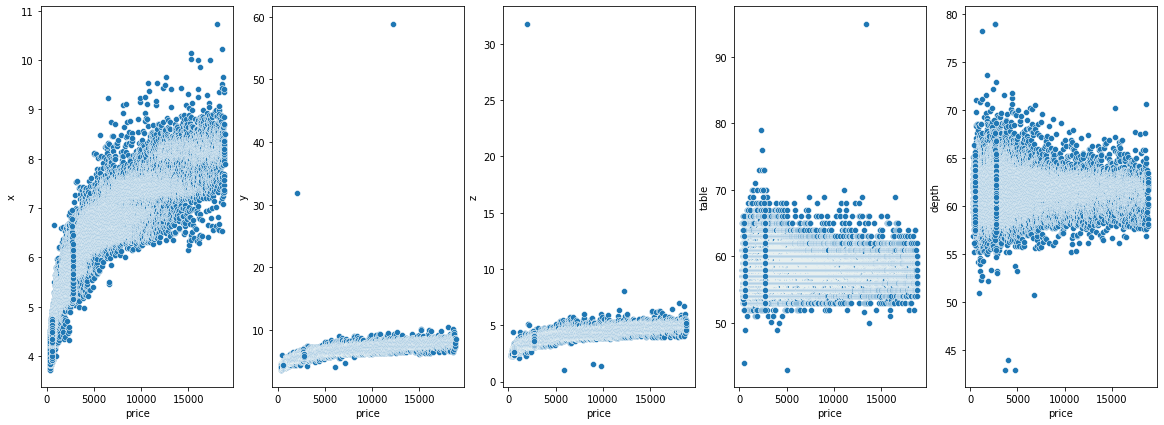

In [14]:
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = diamonds, x = diamonds['price'], y = diamonds[i], ax = axs[c])
    c+=1

#### Capping the columns:
* **x** only values that are < 30
* **y** only values that are < 30
* **z** only values that are < 30 and > 2.5
* **table** only values that are < 80 and > 45
* **depth** only values that are < 75 and > 45

In [15]:
diamonds.shape

(53920, 10)

In [16]:
diamonds = diamonds[(diamonds['x'] < 30)]
diamonds = diamonds[(diamonds['y'] < 30)]
diamonds = diamonds[(diamonds['z'] < 30) & (diamonds['z'] > 2)]
diamonds = diamonds[(diamonds['table'] < 80) & (diamonds['table'] > 40)]
diamonds = diamonds[(diamonds['depth'] < 75) & (diamonds['depth'] > 45)]

diamonds.shape

(53907, 10)

We removed 13 values from the dataset. Now let's have a look again at the cleaned columns:

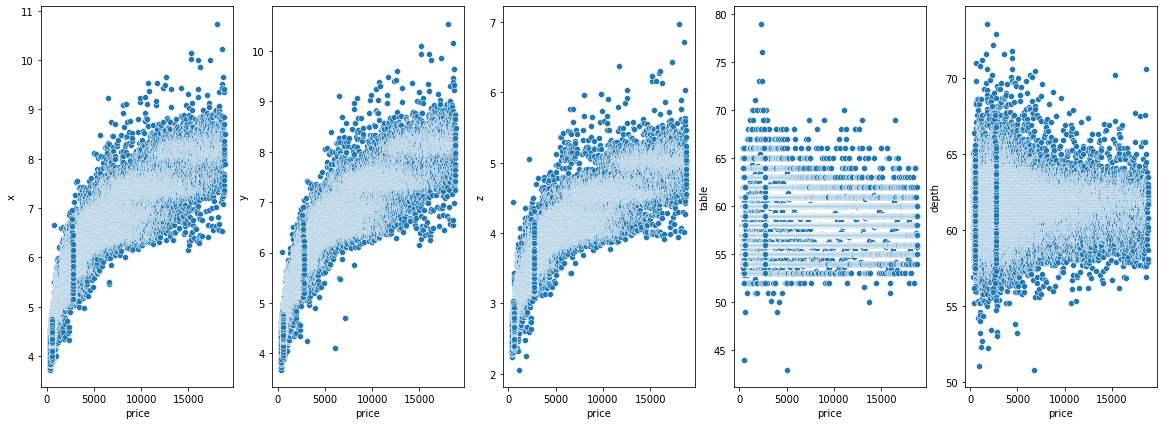

In [17]:
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = diamonds, x = diamonds['price'], y = diamonds[i], ax = axs[c])
    c+=1

This looks much cleaner and will give us better results

#### Let's also have a look at the categorial features:

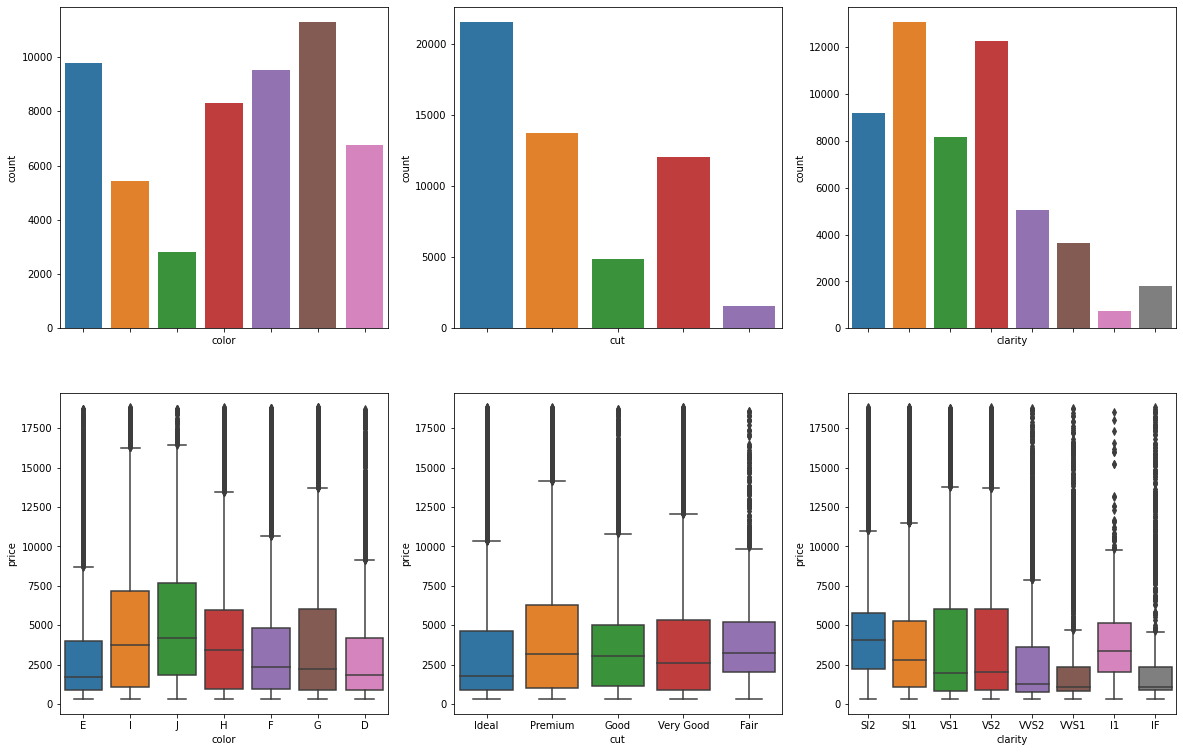

In [18]:
#We can use the cat list again which we created earlier (cats = ['color', 'cut', 'clarity'])

c = 0

fig, axs = plt.subplots(ncols = len(cats), nrows = 2, sharex='col', figsize=(20,13))

for i in cats:
    sns.countplot(data = diamonds, x = diamonds[i], ax = axs[0,c])
    sns.boxplot(data = diamonds, x = diamonds[i], y = diamonds['price'], ax = axs[1,c])
    c+=1



## -- Work in Progress --